In [1]:
from bmtk.builder import NetworkBuilder
from bmtk.utils.sim_setup import build_env_bionet
from bmtk.builder.auxi.node_params import positions_cuboid,positions_list
import numpy as np


# x = np.array([0,0])
# y = np.array([0,0])
# z = np.array([0,200])
# positions = np.vstack([x, y, z]).T

net = NetworkBuilder('bio_net')
net.add_nodes(N=20, 
              pop_name='FSI',
              #positions=positions_list(positions),
              model_type='biophysical',
              model_template='hoc:FSI_Cell',
              morphology='blank.swc')

net.save('network/')

if False:
    build_env_bionet(base_dir='./',      
                    network_dir='network/',
                    tstop=300.0, dt=0.05,
                    include_examples=False,    
                    compile_mechanisms=False,   
                    config_file='config.json',
                    overwrite_config=True
                    )

In [2]:
import os

os.system("python test_spiker_run.py")
# for multiple threads mpiexec -n 2 nrniv -mpi -python test_opto_run.py but needs to be on CLI

--No graphics will be displayed.


2024-11-26 10:35:43,667 [INFO] Created log file
2024-11-26 10:35:43,713 [INFO] Building cells.
2024-11-26 10:35:43,720 [INFO] Building recurrent connections
2024-11-26 10:35:43,726 [INFO] Running simulation for 3000.000 ms with the time step 0.050 ms
2024-11-26 10:35:43,726 [INFO] Starting timestep: 0 at t_sim: 0.000 ms
2024-11-26 10:35:43,726 [INFO] Block save every 5000 steps
2024-11-26 10:35:44,805 [INFO]     step:5000 t_sim:250.00 ms
spikes for gid 0: [] (len=0)
spikes for gid 1: [152.25000000011747, 187.70000000012553, 223.2000000001336] (len=3)
spikes for gid 2: [] (len=0)
spikes for gid 3: [] (len=0)
spikes for gid 4: [152.25000000011747, 187.70000000012553, 223.2000000001336] (len=3)
spikes for gid 5: [] (len=0)
spikes for gid 6: [] (len=0)
spikes for gid 7: [152.25000000011747, 187.70000000012553, 223.2000000001336] (len=3)
spikes for gid 8: [] (len=0)
spikes for gid 9: [] (len=0)
spikes for gid 10: [] (len=0)
spikes for gid 11: [] (len=0)
spikes for gid 12: [152.2500000001174

0

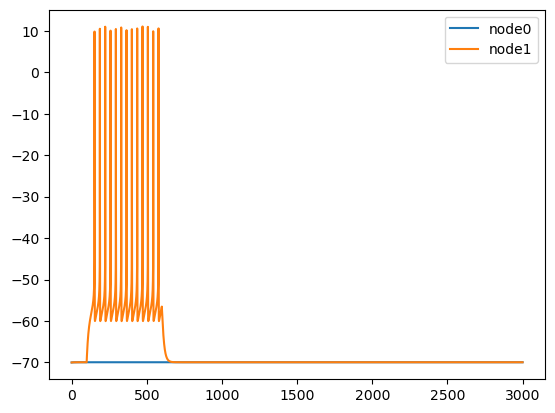

In [3]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

f = h5py.File("output/v_traces.h5")
data = f['report']['bio_net']['data'][:].T
mapping = f['report']['bio_net']['mapping']
time = np.arange(mapping['time'][0],mapping['time'][1],mapping['time'][2])

plt.plot(time,data[0],label='node0')

plt.plot(time,data[1],label='node1')

plt.legend()
plt.show()

In [4]:
g = h5py.File("output/spikes.h5")
g['spikes']['bio_net']['timestamps'][:]

array([152.25, 436.1 , 471.6 , 258.75, 294.15, 329.65, 365.2 , 400.6 ,
       436.1 , 471.6 , 258.75, 294.15, 329.65, 365.2 , 400.6 , 436.1 ,
       471.6 , 507.1 , 542.65, 578.05, 507.1 , 542.65, 578.05, 507.1 ,
       542.65, 578.05, 507.1 , 542.65, 578.05, 507.1 , 400.6 , 542.65,
       365.2 , 294.15, 187.7 , 223.2 , 152.25, 187.7 , 223.2 , 152.25,
       187.7 , 223.2 , 152.25, 187.7 , 223.2 , 152.25, 187.7 , 223.2 ,
       258.75, 294.15, 329.65, 365.2 , 400.6 , 436.1 , 471.6 , 258.75,
       294.15, 329.65, 365.2 , 400.6 , 436.1 , 471.6 , 258.75, 329.65,
       578.05])